In [73]:
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob
from sklearn.manifold import TSNE
import random

SEED = 0
random.seed(SEED)
np.random.seed(SEED)

%matplotlib inline

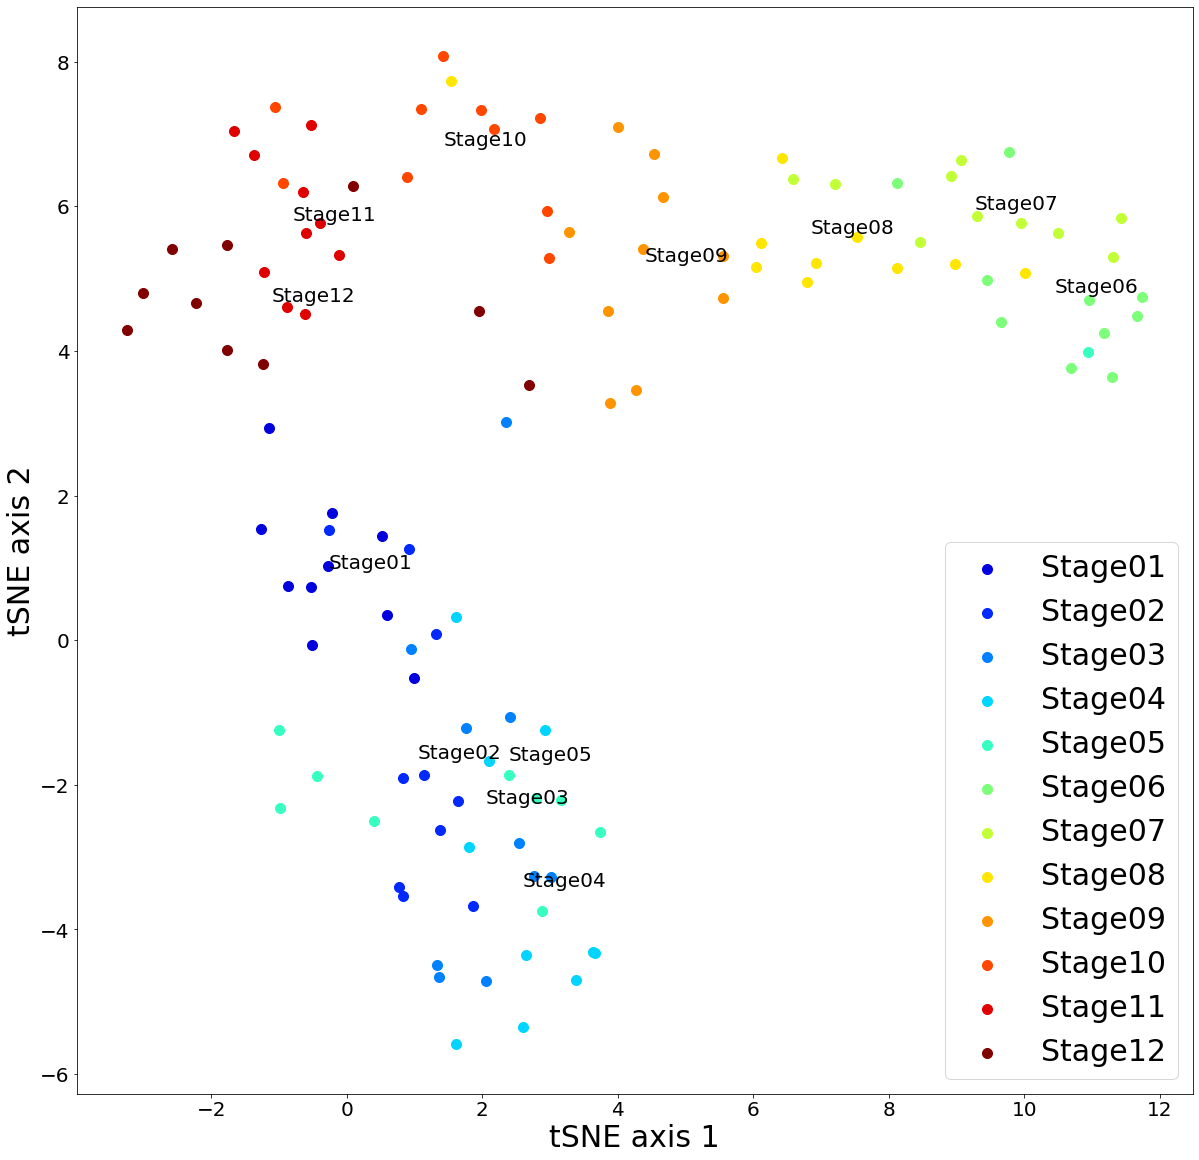

In [92]:
root = '/Users/tokkuman/git-tokkuman/seminiferous_tubule_stage_classification/results/cls12/e1000/test_resnet_20211121_160948'
path_feat = np.sort(glob(os.path.join(root, 'features', '*.npy')))

feat_list, label_list = [], []
for p in path_feat:
    feat_list.append(np.load(p))
    label_list.append(int(p[p.rfind('_')+1:p.rfind('-')]))
        
labelu = np.unique(label_list)
    
tsne = TSNE(n_components=2, random_state=SEED, perplexity=30, n_iter=1000)
embedded = tsne.fit_transform(feat_list)

cm = plt.cm.get_cmap("jet")
plt.figure(figsize=(20, 20))
for labu in labelu:
    embx, emby = [], []
    for emb, lab in zip(embedded, label_list):
        if labu == lab:
            embx.append(emb[0])
            emby.append(emb[1])
    plt.scatter(embx, emby, label='Stage{0:02d}'.format(labu), color=cm(labu/len(labelu)), s=100)
    embx_mean = np.mean(embx)
    emby_mean = np.mean(emby)
    plt.annotate('Stage{0:02d}'.format(labu), (embx_mean, emby_mean), size=20)
plt.xlabel('tSNE axis 1', size=30)
plt.ylabel('tSNE axis 2', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize = 30)

plt.savefig(os.path.join(root, 'figs', 'tSNE_avgpool.pdf'))

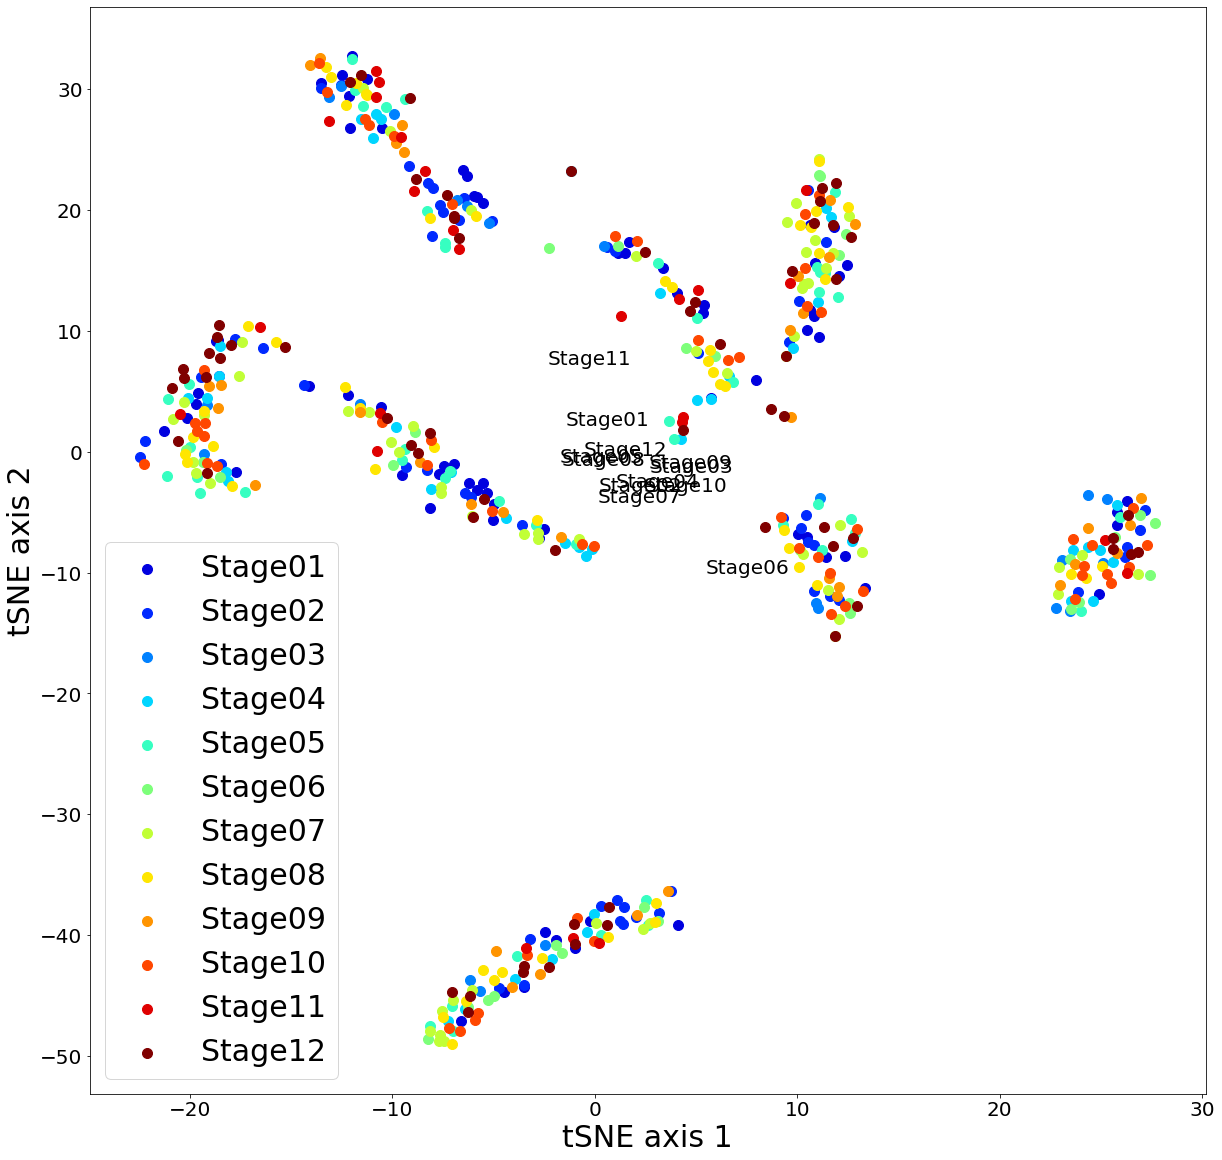

In [98]:
root = '/Users/tokkuman/git-tokkuman/seminiferous_tubule_stage_classification/results/cls12/inference_ResNet_ImageNet/'
path_feat = np.sort(glob(os.path.join(root, 'features', '*.npy')))
os.makedirs(os.path.join(root, 'figs'), exist_ok=True)

feat_list, label_list = [], []
for p in path_feat:
    feat_list.append(np.load(p))
    label_list.append(int(p[p.rfind('_')+1:p.rfind('-')]))
        
labelu = np.unique(label_list)
    
tsne = TSNE(n_components=2, random_state=SEED, perplexity=30, n_iter=1000)
embedded = tsne.fit_transform(feat_list)

cm = plt.cm.get_cmap("jet")
plt.figure(figsize=(20, 20))
for labu in labelu:
    embx, emby = [], []
    for emb, lab in zip(embedded, label_list):
        if labu == lab:
            embx.append(emb[0])
            emby.append(emb[1])
    plt.scatter(embx, emby, label='Stage{0:02d}'.format(labu), color=cm(labu/len(labelu)), s=100)
    embx_mean = np.mean(embx)
    emby_mean = np.mean(emby)
    plt.annotate('Stage{0:02d}'.format(labu), (embx_mean, emby_mean), size=20)
plt.xlabel('tSNE axis 1', size=30)
plt.ylabel('tSNE axis 2', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize = 30)

plt.savefig(os.path.join(root, 'figs', 'tSNE_avgpool_label_stage.pdf'))

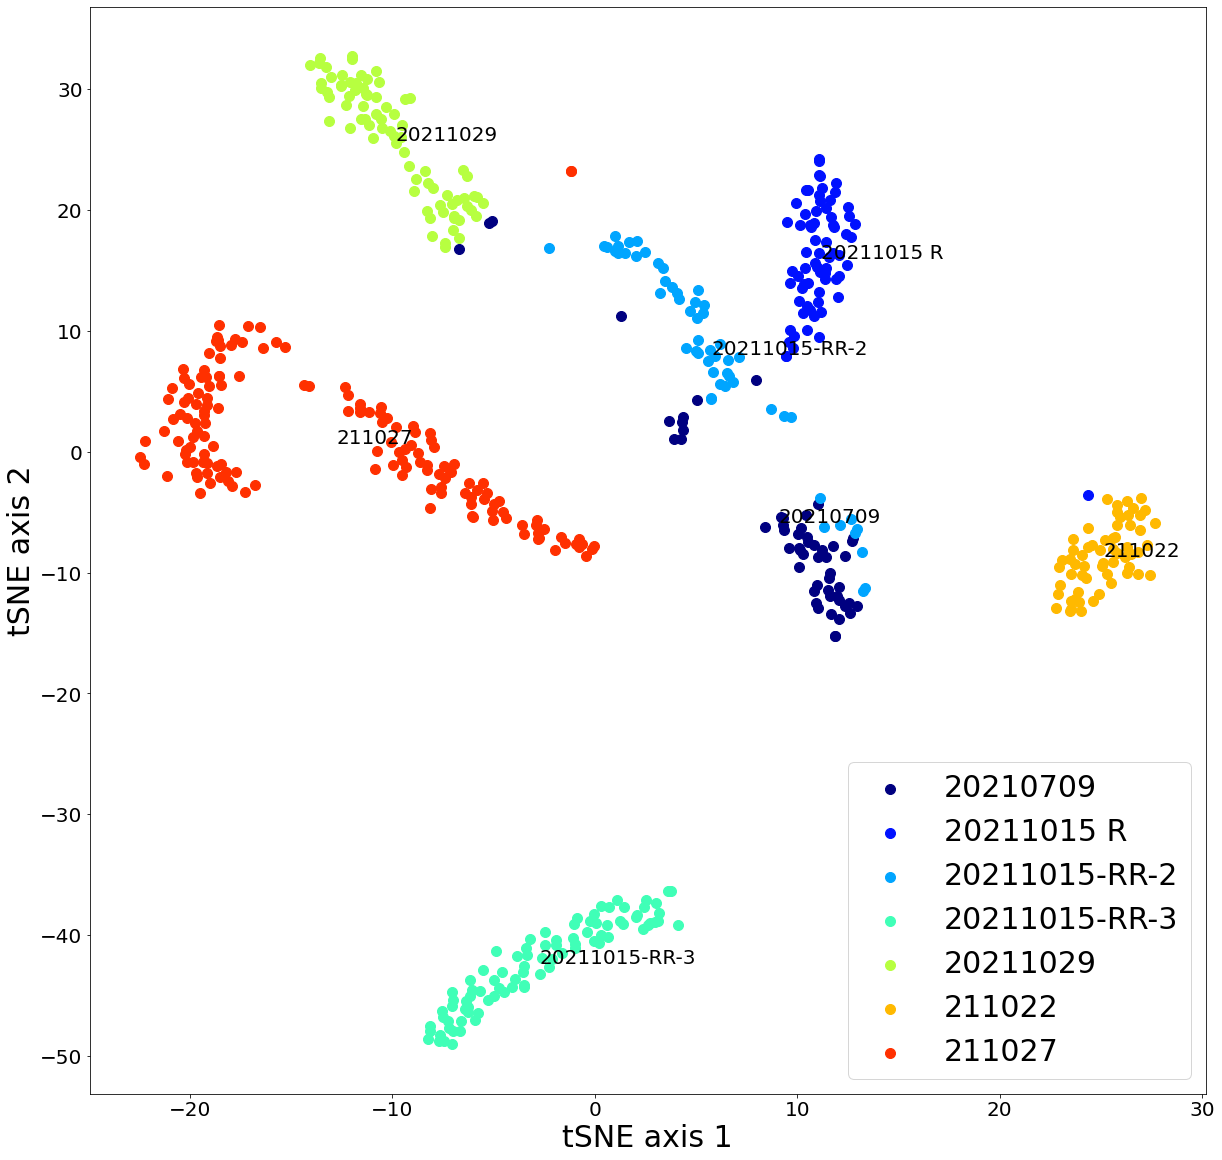

In [97]:
root = '/Users/tokkuman/git-tokkuman/seminiferous_tubule_stage_classification/results/cls12/inference_ResNet_ImageNet/'
path_feat = np.sort(glob(os.path.join(root, 'features', '*.npy')))
os.makedirs(os.path.join(root, 'figs'), exist_ok=True)

feat_list, label_list = [], []
for p in path_feat:
    feat_list.append(np.load(p))
    p = os.path.basename(p)
    label_list.append(p[:p.find('_')])
        
labelu = np.unique(label_list)
    
tsne = TSNE(n_components=2, random_state=SEED, perplexity=30, n_iter=1000)
embedded = tsne.fit_transform(feat_list)

cm = plt.cm.get_cmap("jet")
plt.figure(figsize=(20, 20))
for i, labu in enumerate(labelu):
    embx, emby = [], []
    for emb, lab in zip(embedded, label_list):
        if labu == lab:
            embx.append(emb[0])
            emby.append(emb[1])
    plt.scatter(embx, emby, label='{}'.format(labu), color=cm(i/len(labelu)), s=100)
    embx_mean = np.mean(embx)
    emby_mean = np.mean(emby)
    plt.annotate('{}'.format(labu), (embx_mean, emby_mean), size=20)
plt.xlabel('tSNE axis 1', size=30)
plt.ylabel('tSNE axis 2', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize = 30)

plt.savefig(os.path.join(root, 'figs', 'tSNE_avgpool_label_day.pdf'))